In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import History
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler





In [2]:
# stock_data = pd.read_csv('data/MSN.csv')
# dataset_train, dataset_test = train_test_split(stock_data, test_size=0.3, shuffle=False)

# print("Training set size:", len(dataset_train))
# print("Testing set size:", len(dataset_test))

In [3]:
file_paths = ['FPT.csv', 'MSN.csv', 'PNJ.csv', 'VIC.csv']

data_frames = {}

for file_path in file_paths:
    company_name = file_path.split('.')[0]
    df = pd.read_csv('data/' + file_path)
    data_frames[company_name] = df

train_test_data = {}

for company_name, df in data_frames.items():
    stock_data = df[df['Ticker'] == company_name]
    dataset_train, dataset_test = train_test_split(stock_data, test_size=0.3, shuffle=False)

    train_test_data[company_name] = {
        'dataset_train': dataset_train,
        'dataset_test': dataset_test
    }

for company_name, data in train_test_data.items():
    print(f"\nTrain and test data for {company_name}:")
    print(f"dataset_train shape: {data['dataset_train'].shape}")
    print(f"dataset_test shape: {data['dataset_test'].shape}")




Train and test data for FPT:
dataset_train shape: (68184, 8)
dataset_test shape: (29222, 8)

Train and test data for MSN:
dataset_train shape: (94747, 8)
dataset_test shape: (40607, 8)

Train and test data for PNJ:
dataset_train shape: (87716, 8)
dataset_test shape: (37593, 8)

Train and test data for VIC:
dataset_train shape: (70886, 8)
dataset_test shape: (30380, 8)


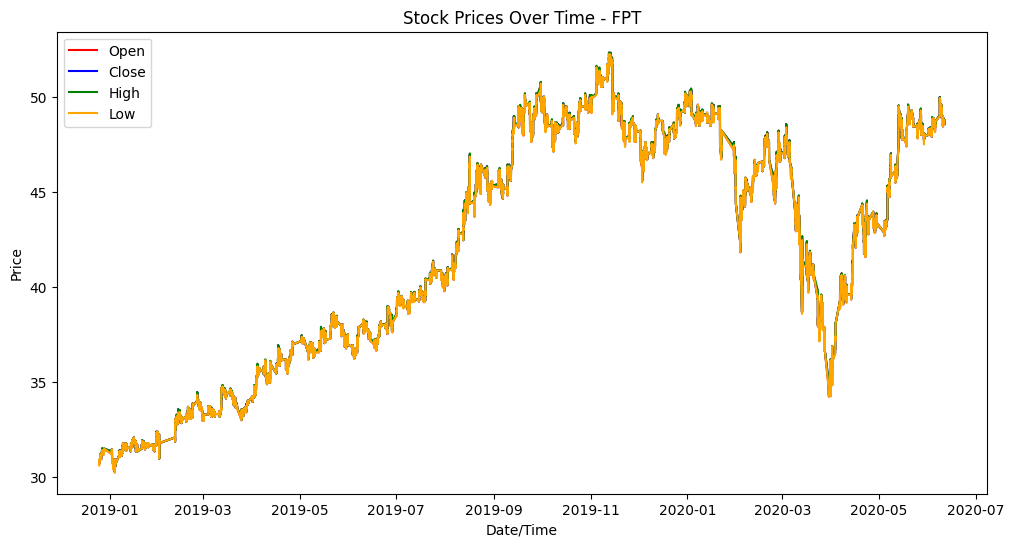

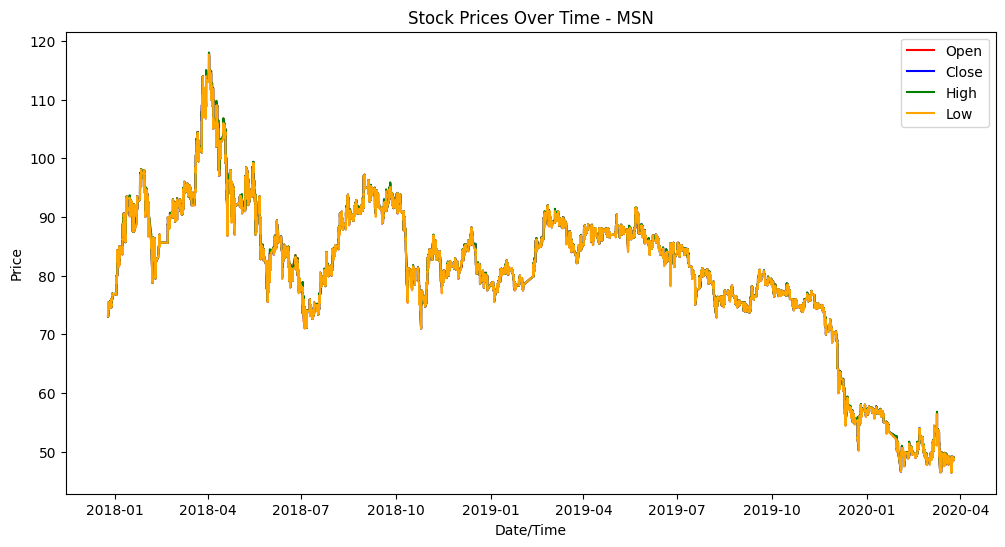

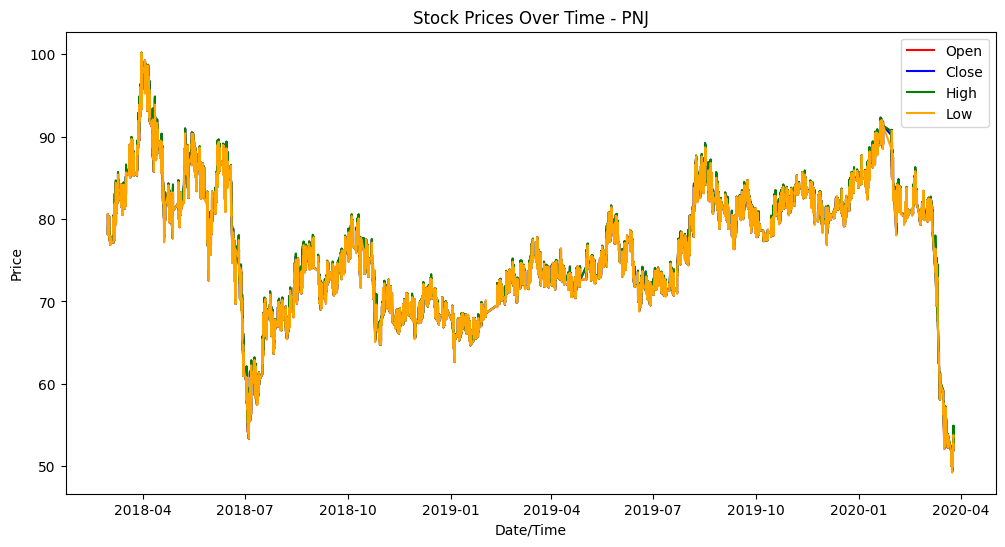

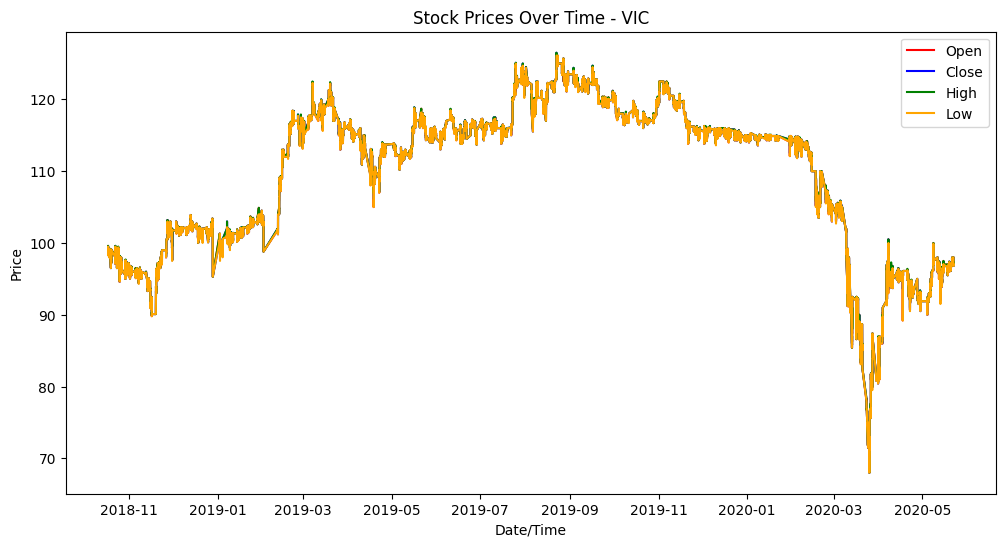

In [4]:
for company_name, data in train_test_data.items():
    df = data['dataset_train']
    df = df.sort_values(by='Date/Time', ascending=True)
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date/Time', y='Open', data=df, label='Open', color='red')
    sns.lineplot(x='Date/Time', y='Close', data=df, label='Close', color='blue')
    sns.lineplot(x='Date/Time', y='High', data=df, label='High', color='green')
    sns.lineplot(x='Date/Time', y='Low', data=df, label='Low', color='orange')

    plt.title(f'Stock Prices Over Time - {company_name}')
    plt.xlabel('Date/Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [5]:

# for company_name, data in train_test_data.items():
#     df = data['dataset_train']
#     df = df.sort_values(by='Date/Time', ascending=True)
#     df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

#     # Plot trading volume over time
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Date/Time', y='Volume', data=df, color='purple')

#     plt.title(f'Trading Volume Over Time - {company_name}')
#     plt.xlabel('Date/Time')
#     plt.ylabel('Volume')
#     plt.show()


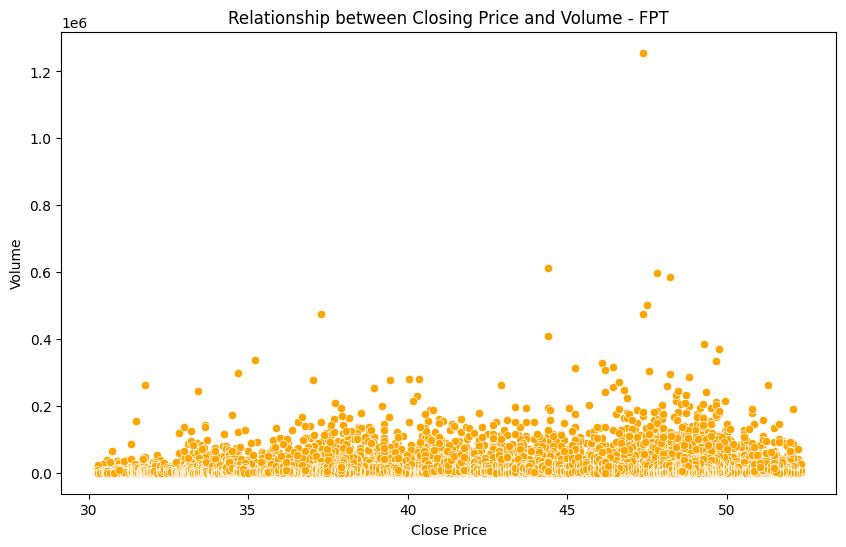

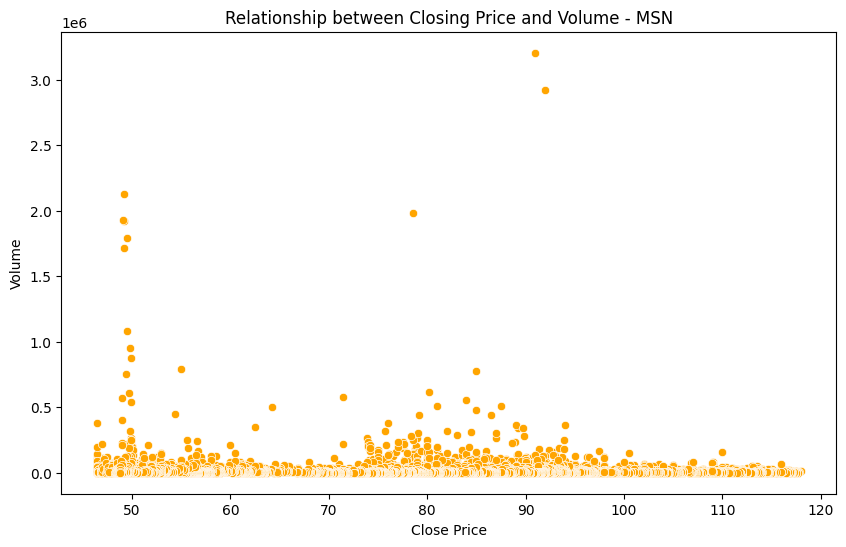

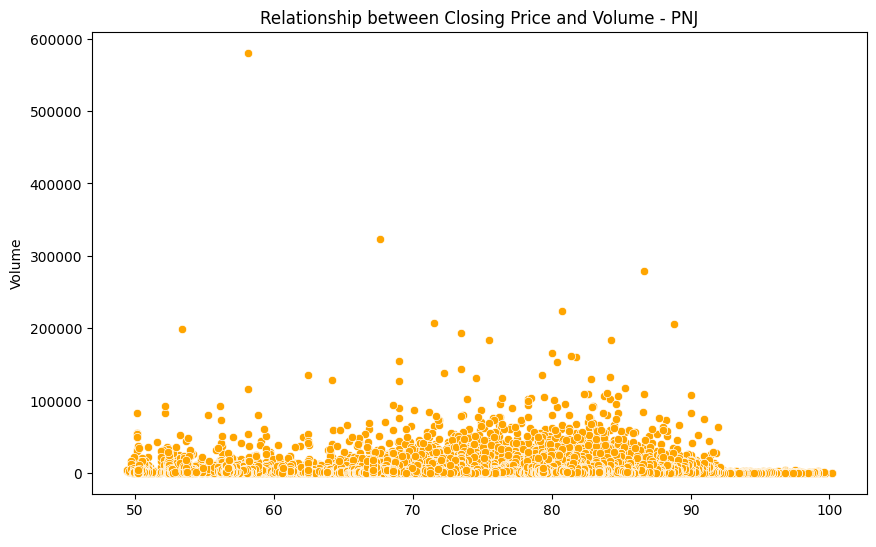

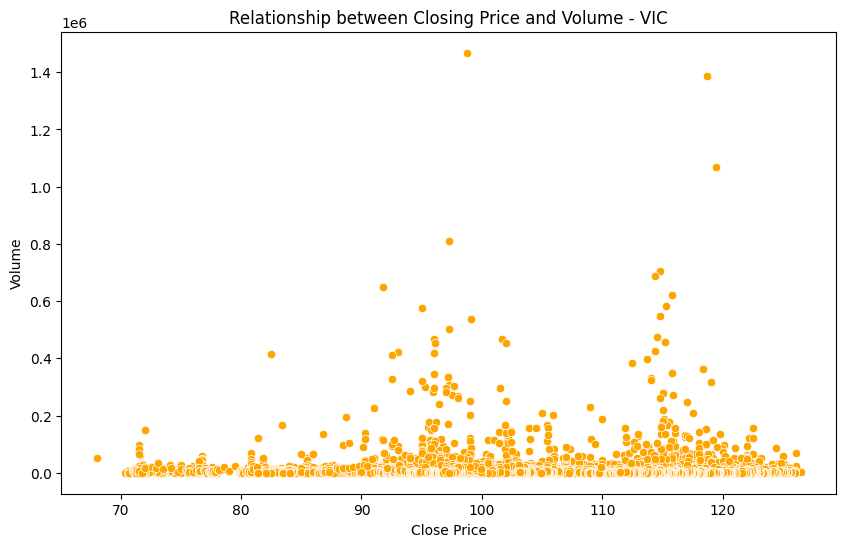

In [6]:
 # Plot the relationship between closing price and volume
for company_name, data in train_test_data.items():
    df = data['dataset_train']
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Close', y='Volume', data=df, color='orange')

    plt.title(f'Relationship between Closing Price and Volume - {company_name}')
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.show()


In [7]:
fpt_train_data = train_test_data['FPT']['dataset_train']
msn_train_data = train_test_data['MSN']['dataset_train']
pnj_train_data = train_test_data['PNJ']['dataset_train']
vic_train_data = train_test_data['VIC']['dataset_train']

fpt_test_data = train_test_data['FPT']['dataset_test']
msn_test_data = train_test_data['MSN']['dataset_test']
pnj_test_data = train_test_data['PNJ']['dataset_test']
vic_test_data = train_test_data['VIC']['dataset_test']
# print(fpt_train_data.head(10))

# fpt_train_data = fpt_train_data.iloc[:, 5:6].values
# print(fpt_train_data)

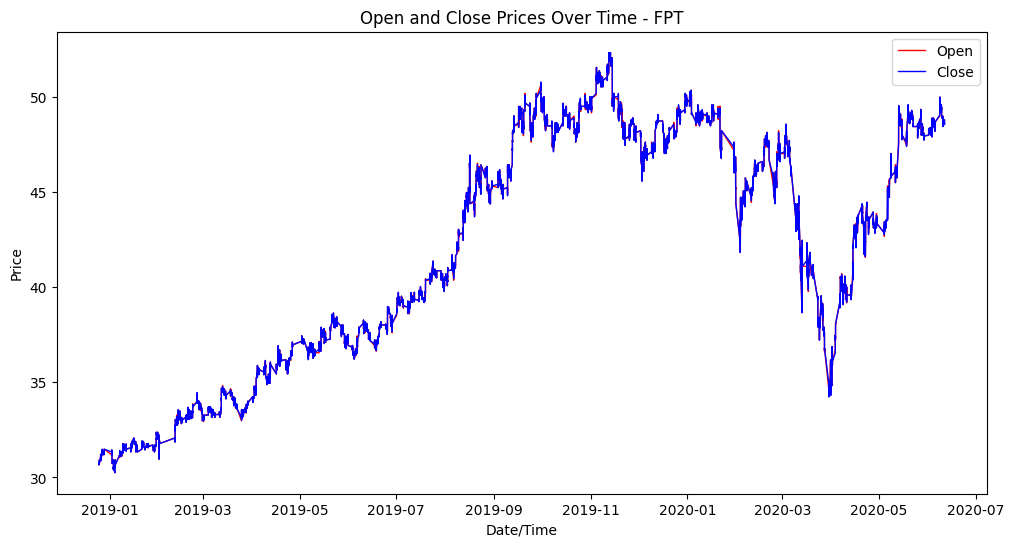

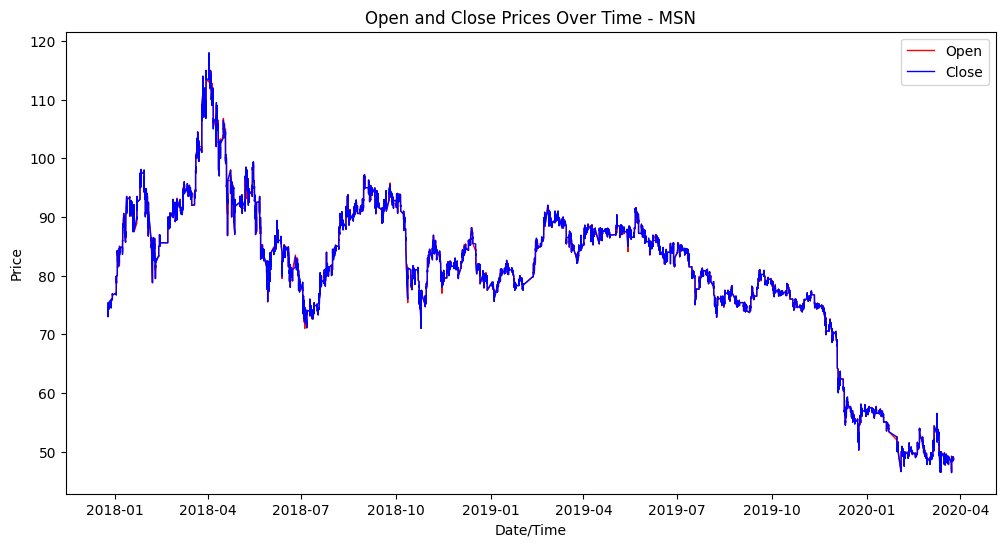

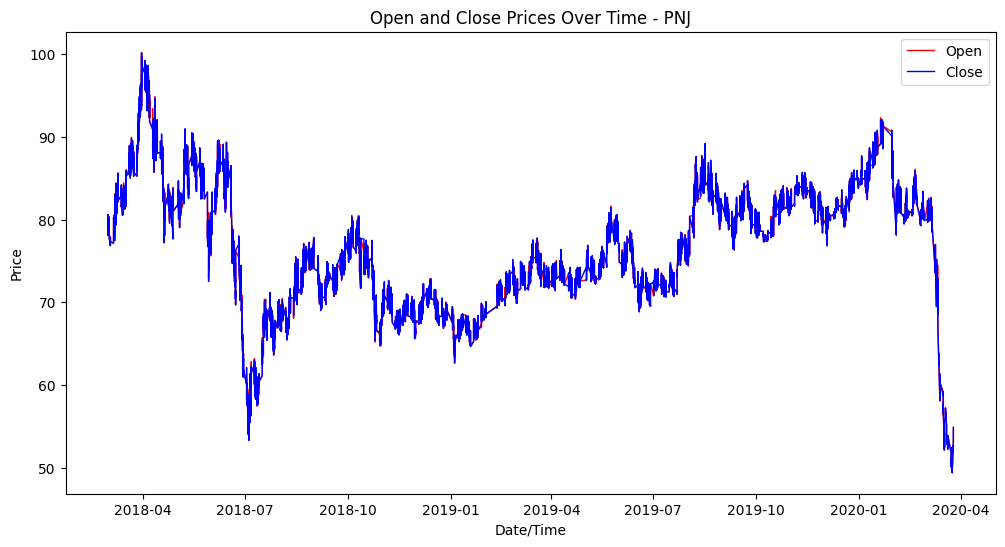

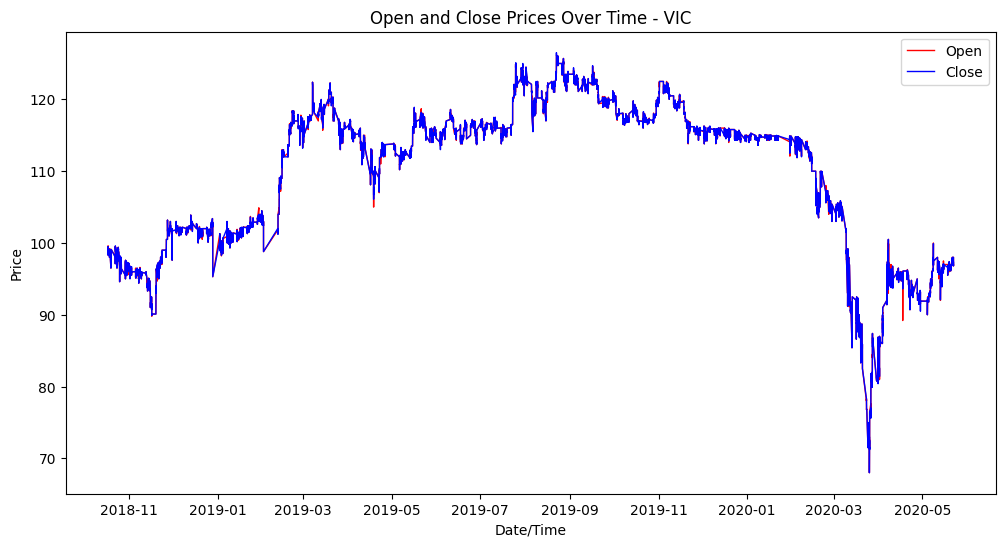

In [8]:

for company_name, data in train_test_data.items():
    company_train_df = data['dataset_train']
    #df = df.sort_values(by='Date/Time', ascending=True)

    company_train_df['Date/Time'] = pd.to_datetime(company_train_df['Date/Time'], format='%m/%d/%Y %H:%M')
    plt.figure(figsize=(12, 6))
    plt.plot(company_train_df['Date/Time'], company_train_df['Open'], label='Open', color='red', linewidth=1.0)
    plt.plot(company_train_df['Date/Time'], company_train_df['Close'], label='Close', color='blue', linewidth=1.0)

    plt.xlabel('Date/Time')
    plt.ylabel('Price')
    plt.title(f'Open and Close Prices Over Time - {company_name}')
    plt.legend()
    plt.show()


In [9]:
# df = dataset_train.copy()
# df = dataset_train[['Ticker','Date/Time','Open','Close']]

# df

In [10]:
def prepare_data_for_lstm(training_set, time_steps=60):
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    # Tao du lieu train, X = 60 time steps, Y =  1 time step
    X_train = []
    y_train = []
    no_of_sample = len(training_set)
    for i in range(time_steps, no_of_sample):
        X_train.append(training_set_scaled[i-time_steps:i, 0])
        y_train.append(training_set_scaled[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    return X_train, y_train



Epoch 1/50

2129/2129 [==============================] - 131s 58ms/step - loss: 0.0029
Epoch 2/50
2129/2129 [==============================] - 113s 53ms/step - loss: 0.0011
Epoch 3/50
2129/2129 [==============================] - 133s 62ms/step - loss: 7.3570e-04
Epoch 4/50
2129/2129 [==============================] - 136s 64ms/step - loss: 6.3845e-04
Epoch 5/50
2129/2129 [==============================] - 132s 62ms/step - loss: 6.0361e-04
Epoch 6/50
2129/2129 [==============================] - 132s 62ms/step - loss: 5.7527e-04
Epoch 7/50
2129/2129 [==============================] - 130s 61ms/step - loss: 5.5301e-04
Epoch 8/50
2129/2129 [==============================] - 131s 61ms/step - loss: 5.3817e-04
Epoch 9/50
2129/2129 [==============================] - 136s 64ms/step - loss: 5.1922e-04
Epoch 10/50
2129/2129 [==============================] - 147s 69ms/step - loss: 5.0878e-04
Epoch 11/50
2129/2129 [==============================] - 143s 67ms/step - loss: 5.0043e-04
Epoch 12/50
2

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


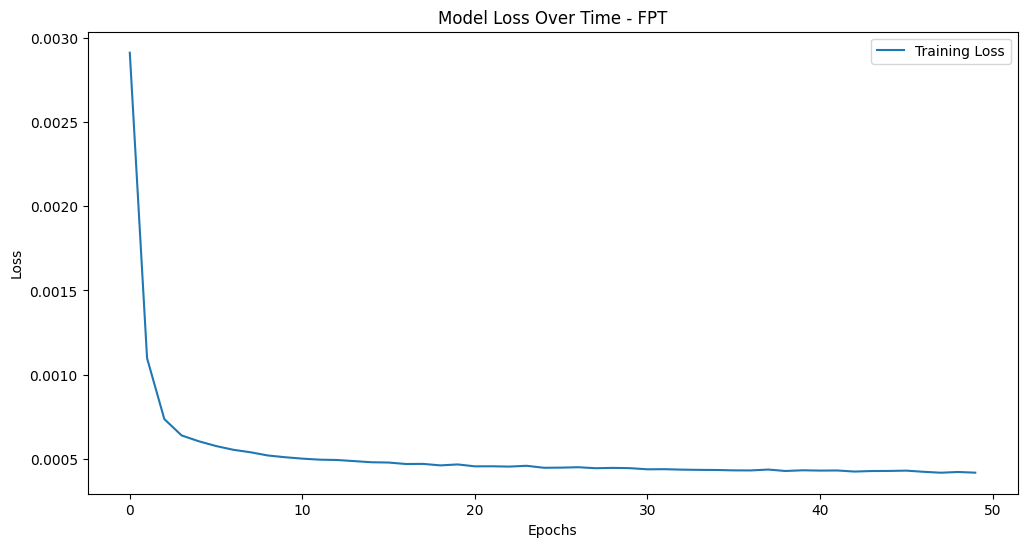

Epoch 1/50
2959/2959 [==============================] - 148s 48ms/step - loss: 0.0015
Epoch 2/50
2959/2959 [==============================] - 141s 48ms/step - loss: 4.7446e-04
Epoch 3/50
2959/2959 [==============================] - 145s 49ms/step - loss: 3.8764e-04
Epoch 4/50
2959/2959 [==============================] - 142s 48ms/step - loss: 3.5798e-04
Epoch 5/50
2959/2959 [==============================] - 160s 54ms/step - loss: 3.3356e-04
Epoch 6/50
2959/2959 [==============================] - 173s 59ms/step - loss: 3.1918e-04
Epoch 7/50
2959/2959 [==============================] - 162s 55ms/step - loss: 3.0476e-04
Epoch 8/50
2959/2959 [==============================] - 160s 54ms/step - loss: 3.0057e-04
Epoch 9/50
2959/2959 [==============================] - 160s 54ms/step - loss: 2.9353e-04
Epoch 10/50
2959/2959 [==============================] - 160s 54ms/step - loss: 2.8381e-04
Epoch 11/50
2959/2959 [==============================] - 162s 55ms/step - loss: 2.8510e-04
Epoch 12/50


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None

Training history for MSN:
{'loss': [0.0015479022404178977, 0.00047445850213989615, 0.00038764456985518336, 0.0003579776384867728, 0.00033356292988173664, 0.000319179700454697, 0.00030475709354504943, 0.00030057301046326756, 0.0002935310185421258, 0.0002838121145032346, 0.00028510080301202834, 0.0002836435451172292, 0.00028148310957476497, 0.0002798064087983221, 0.0002759010822046548, 0.00027354530175216496, 0.00026930985040962696, 0.00027228606631979346, 0.0002700215554796159, 0.000265755457803607, 0.0002621670428197831, 0.0002651583927217871, 0.00026426996919326484, 0.00025862324400804937, 0.0002638695004861802, 0.0002601608575787395, 0.0002636658027768135, 0.0002566566108725965, 0.00025488543906249106, 0.00025578183704055846, 0.00025333603844046593, 0.00025607645511627197, 0.0002591004886198789, 0.0002531866484787315, 0.00025375865516252816, 0.0002483085554558784, 0.0002519345434848219, 0.00025078054750338197, 0.0002502834831830114, 0.00025218253722414374, 0.0002481838164385408

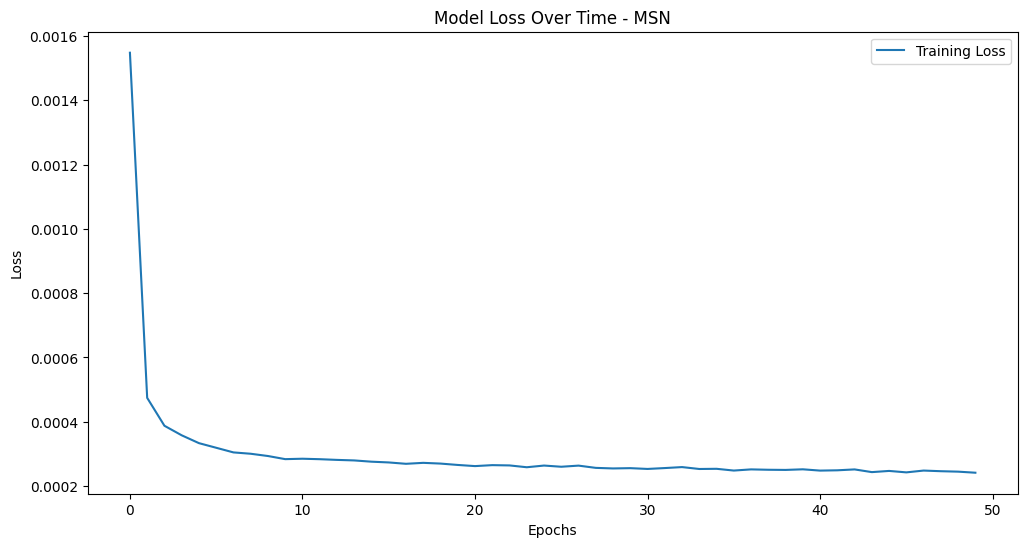

Epoch 1/50
2740/2740 [==============================] - 166s 58ms/step - loss: 0.0020
Epoch 2/50
2740/2740 [==============================] - 158s 58ms/step - loss: 6.0741e-04
Epoch 3/50
2740/2740 [==============================] - 183s 67ms/step - loss: 4.3271e-04
Epoch 4/50
2740/2740 [==============================] - 188s 69ms/step - loss: 4.2082e-04
Epoch 5/50
2740/2740 [==============================] - 152s 55ms/step - loss: 3.9889e-04
Epoch 6/50
2740/2740 [==============================] - 165s 60ms/step - loss: 3.9309e-04
Epoch 7/50
2740/2740 [==============================] - 158s 58ms/step - loss: 3.7671e-04
Epoch 8/50
2740/2740 [==============================] - 168s 61ms/step - loss: 3.7985e-04
Epoch 9/50
2740/2740 [==============================] - 175s 64ms/step - loss: 3.7020e-04
Epoch 10/50
2740/2740 [==============================] - 154s 56ms/step - loss: 3.6638e-04
Epoch 11/50
2740/2740 [==============================] - 155s 57ms/step - loss: 3.7261e-04
Epoch 12/50


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


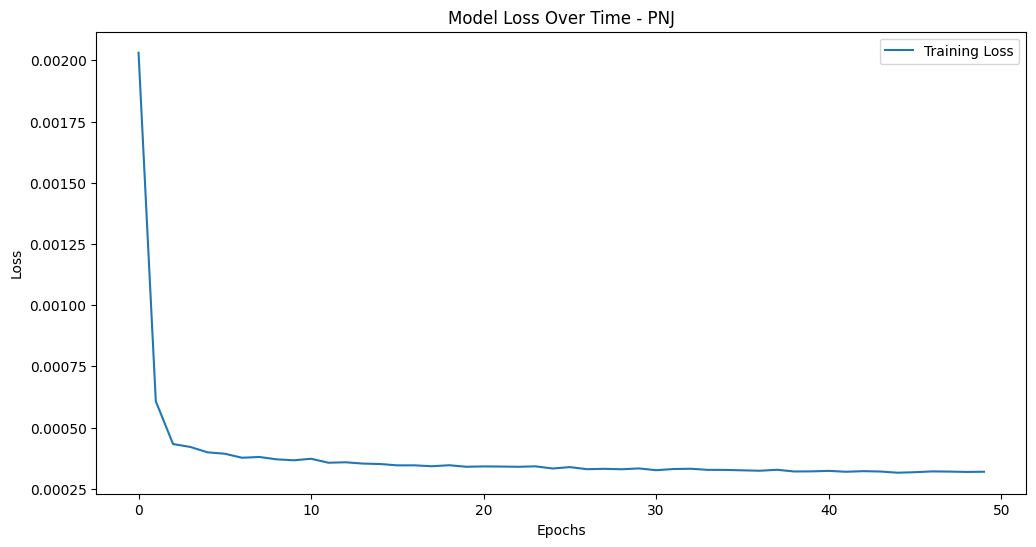

Epoch 1/50
2214/2214 [==============================] - 125s 53ms/step - loss: 0.0040
Epoch 2/50
2214/2214 [==============================] - 111s 50ms/step - loss: 0.0012
Epoch 3/50
2214/2214 [==============================] - 109s 49ms/step - loss: 5.0550e-04
Epoch 4/50
2214/2214 [==============================] - 110s 50ms/step - loss: 3.7989e-04
Epoch 5/50
2214/2214 [==============================] - 110s 50ms/step - loss: 3.4012e-04
Epoch 6/50
2214/2214 [==============================] - 110s 50ms/step - loss: 3.2356e-04
Epoch 7/50
2214/2214 [==============================] - 118s 53ms/step - loss: 3.1480e-04
Epoch 8/50
2214/2214 [==============================] - 119s 54ms/step - loss: 3.0161e-04
Epoch 9/50
2214/2214 [==============================] - 120s 54ms/step - loss: 3.0093e-04
Epoch 10/50
2214/2214 [==============================] - 120s 54ms/step - loss: 2.9404e-04
Epoch 11/50
2214/2214 [==============================] - 120s 54ms/step - loss: 2.9172e-04
Epoch 12/50
2214

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


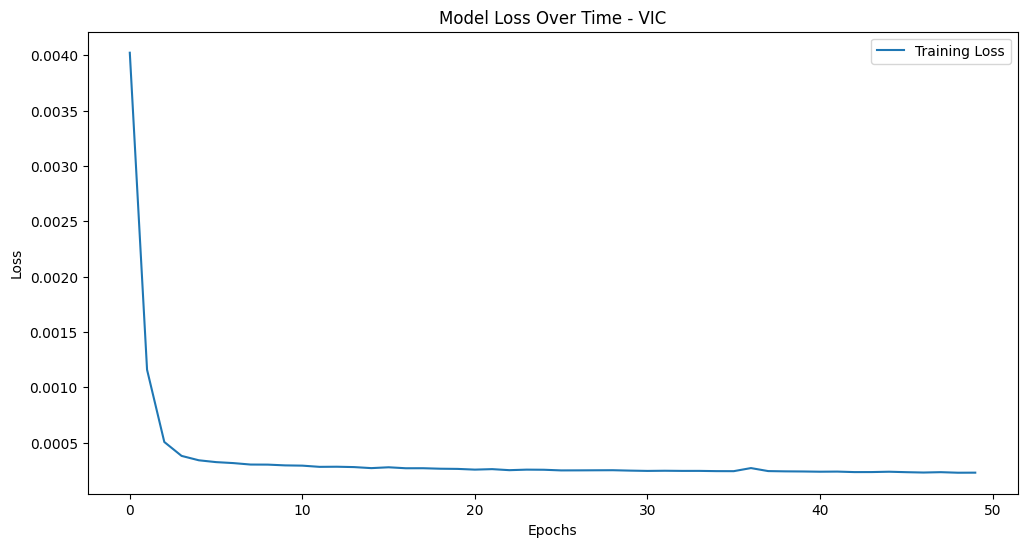

In [11]:
def create_lstm_model(X_train):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return regressor

def train_and_save_model(X_train, y_train, model_save_path, epochs=50, batch_size=32):
    regressor = create_lstm_model(X_train)

    history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[History()])

    if not path.exists(model_save_path):
        regressor.save(model_save_path)

    return regressor, history

for company_name, data in train_test_data.items():
    training_set = data['dataset_train']
    training_set = training_set.iloc[:, 5:6].values
    X_train, y_train = prepare_data_for_lstm(training_set)
    model_save_path = f"model/{company_name}_model.h5"
    model, history = train_and_save_model(X_train, y_train, model_save_path)
    print(f"\nModel summary for {company_name}:")
    print(model.summary())
    
    print(f"\nTraining history for {company_name}:")
    print(history.history)

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model Loss Over Time - {company_name}')
    plt.legend()
    plt.show()


In [12]:

print(history.history.keys())

dict_keys(['loss'])


914/914 [==============================] - 19s 19ms/step


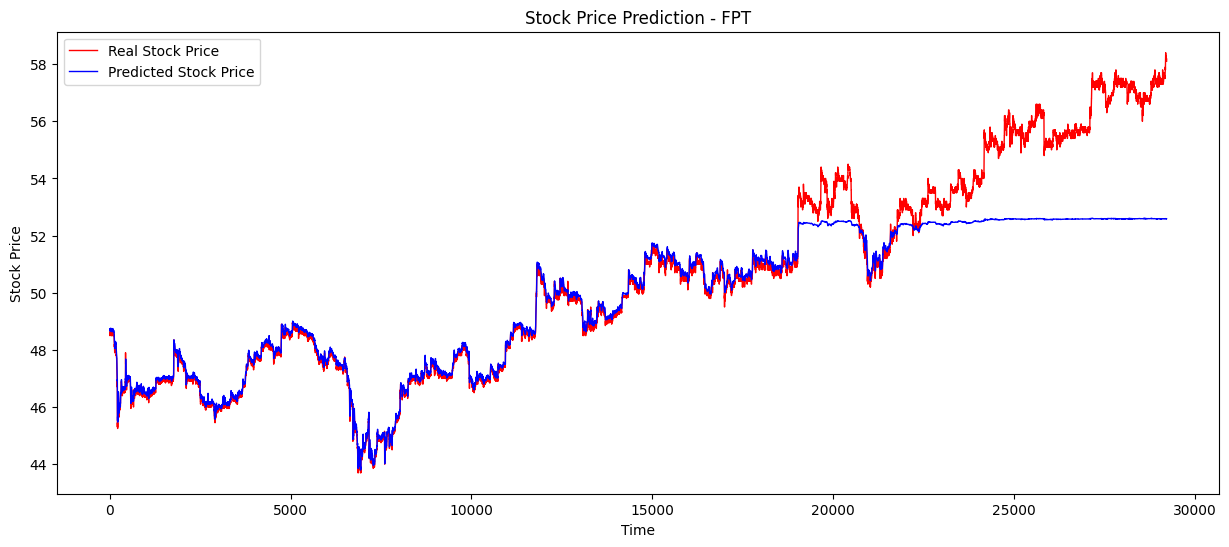

1269/1269 [==============================] - 28s 20ms/step


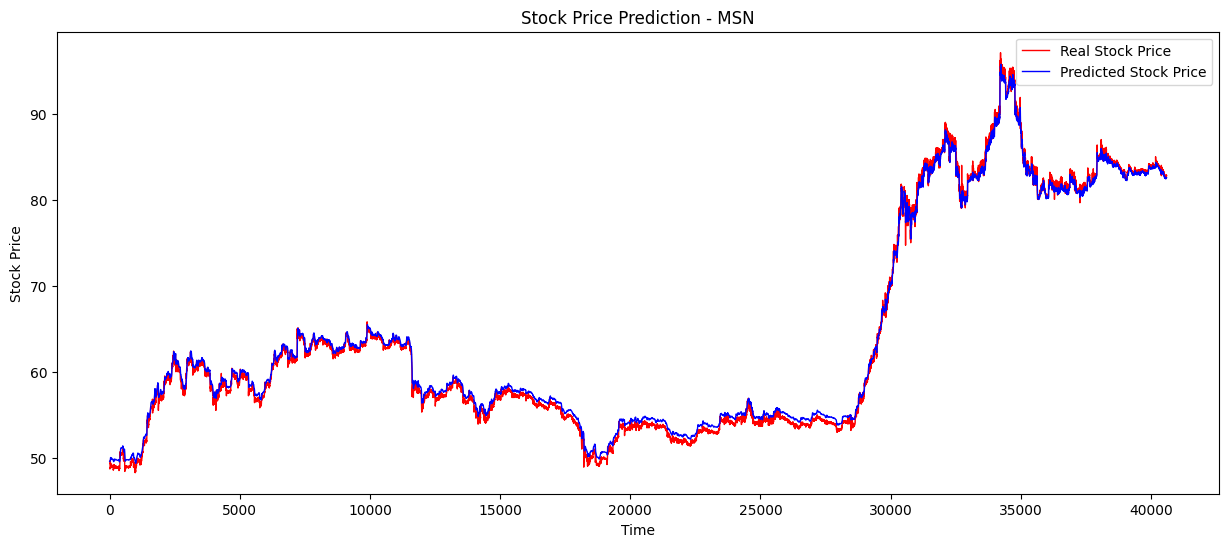

1175/1175 [==============================] - 26s 21ms/step


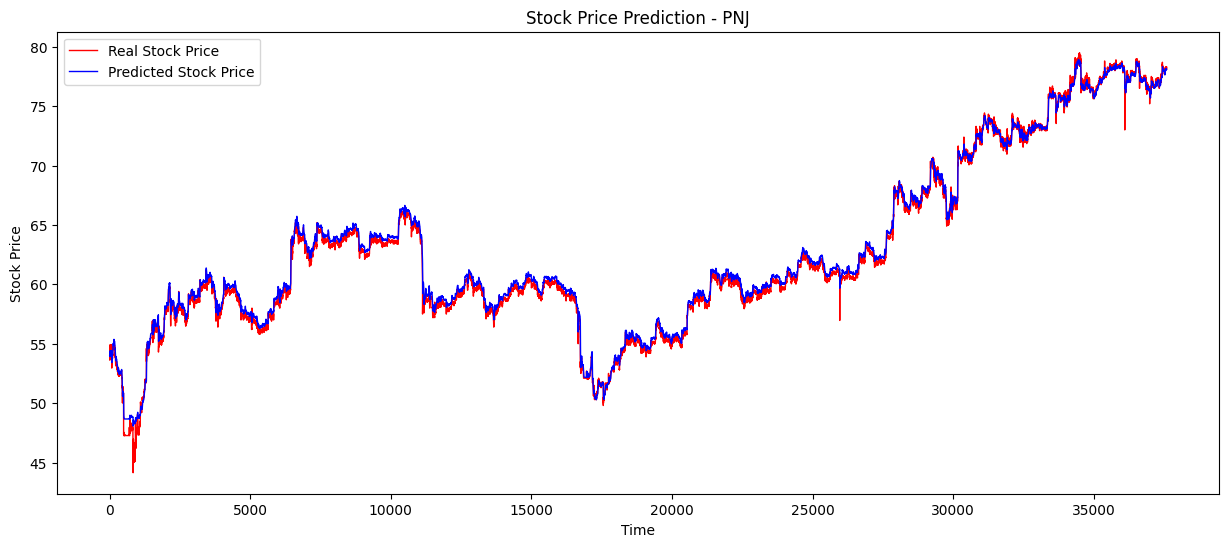

950/950 [==============================] - 21s 20ms/step


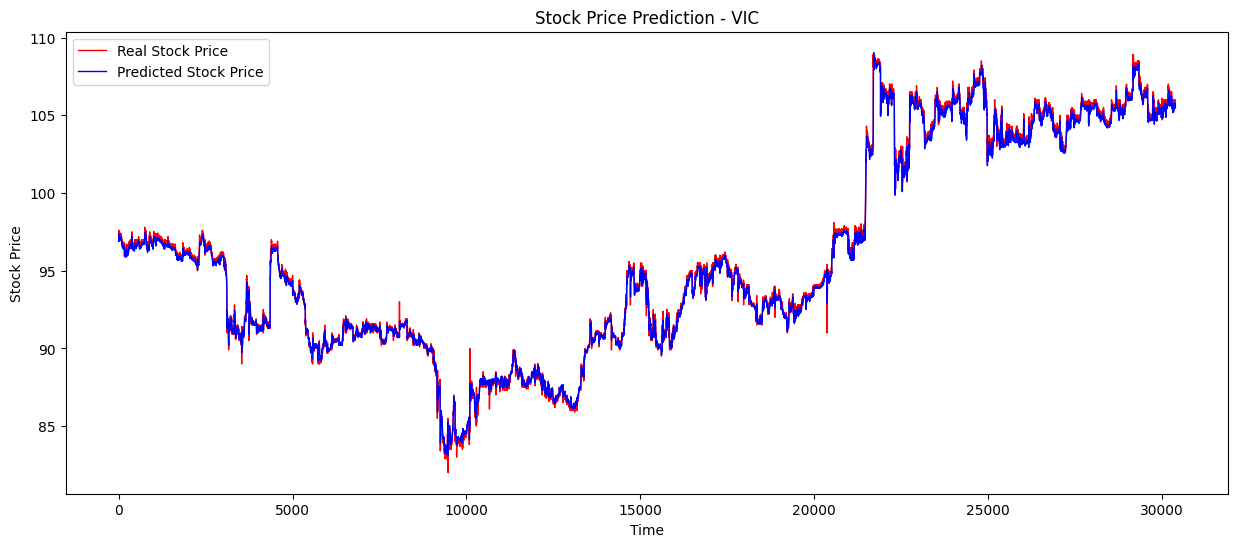

In [16]:
def predict_and_plot_stock_price(model, X_test, real_stock_price, sc,company_name):
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    plt.figure(figsize=(15, 6))
    plt.plot(real_stock_price, color='red', label='Real Stock Price', linewidth=1.0)
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price', linewidth=1.0)

    plt.title(f'Stock Price Prediction - {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend(markerscale=2)
    plt.show()

for company_name, data in train_test_data.items():
    sc = MinMaxScaler(feature_range=(0, 1))
    df_test = data['dataset_test']
    real_stock_price = df_test.iloc[:, 5:6].values

    if 'dataset_train' in data:
        df_train = data['dataset_train']
        training_set = df_train[['Close']].values
        sc.fit(training_set)

        dataset_total = pd.concat((df_train['Close'], df_test['Close']), axis=0)
        inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
        inputs = inputs.reshape(-1, 1)
        inputs = sc.transform(inputs)

        X_test = []
        no_of_sample = len(inputs)

        for i in range(60, no_of_sample):
            X_test.append(inputs[i-60:i, 0])

        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        model_path = f"model/{company_name}_model.h5"
        trained_model = load_model(model_path)

        predict_and_plot_stock_price(trained_model, X_test, real_stock_price, sc,company_name)


In [15]:
"""
1.Prepare Test Data:
    - Select the nearest 60 data points from dataset_test to use as input for prediction.
    - Convert to a NumPy array for ease of processing.
2.Normalize Input Data:
    - Reshape the data to fit the LSTM model's requirements (3D array).
    - Normalize the data using the MinMaxScaler previously employed during training.
3.Predict Stock Prices and Update Data:
    - Iterate (num_predictions) times to predict stock prices for each upcoming day.
    - Use the latest 60 data points to predict the price for the next day.
    - Update the test data with the newly predicted price for subsequent predictions.
    - Print the predicted stock price for each day.
"""
def predict_stock_prices(regressor, dataset_test, sc, num_predictions=10):
    dataset_test = dataset_test['Close'][len(dataset_test) - 60:len(dataset_test)].to_numpy()
    dataset_test = np.array(dataset_test)

    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)
    
    i = 0
    while i < num_predictions:
        X_test = []
        no_of_sample = len(dataset_test)
        # Lay du lieu cuoi cung
        X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        # Du doan gia
        predicted_stock_price = regressor.predict(X_test)

        # chuyen gia tu khoang (0,1) thanh gia that
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # Them ngay hien tai vao
        dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
        inputs = dataset_test
        inputs = inputs.reshape(-1, 1)
        inputs = sc.transform(inputs)

        print(f'Predicted stock price for day {i + 1}: {predicted_stock_price[0][0]}')
        i += 1


# model_path = f"model/FPT_model.h5"
# trained_model = load_model(model_path)
# print("Stock Prediction of FPT are : ")
# predict_stock_prices(trained_model, dataset_test, sc)

for company_name in ['FPT', 'MSN', 'PNJ', 'VIC']:
    model_path = f"model/{company_name}_model.h5"
    trained_model = load_model(model_path)
    print("Stock Prediction of " + company_name + " are : ")
    predict_stock_prices(trained_model, dataset_test, sc)


Stock Prediction of FPT are : 
1/1 [==============================] - 2s 2s/step
Predicted stock price for day 1: 105.96073150634766
1/1 [==============================] - 0s 39ms/step
Predicted stock price for day 2: 106.10599517822266
1/1 [==============================] - 0s 35ms/step
Predicted stock price for day 3: 106.32677459716797
1/1 [==============================] - 0s 36ms/step
Predicted stock price for day 4: 106.52619171142578
1/1 [==============================] - 0s 33ms/step
Predicted stock price for day 5: 106.7590560913086
1/1 [==============================] - 0s 33ms/step
Predicted stock price for day 6: 106.98145294189453
1/1 [==============================] - 0s 37ms/step
Predicted stock price for day 7: 107.18638610839844
1/1 [==============================] - 0s 40ms/step
Predicted stock price for day 8: 107.3819580078125
1/1 [==============================] - 0s 35ms/step
Predicted stock price for day 9: 107.5622329711914
1/1 [==============================] -